In [167]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib as mat 
import seaborn as sns; sns.set() 
import matplotlib.pyplot as plt 
import datetime 
import scipy.stats as stats
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
import statsmodels.stats.multicomp
from statistics import mean 
import plotly.express as px 
import plotly.graph_objects as go 
from plotly.subplots import make_subplots 
import chart_studio 
import plotly.io as pio 
import chart_studio.tools as tls 
import chart_studio.plotly as py
import plotly.express as px
from plotly.tools import FigureFactory as FF
pd.set_option("display.precision", 2)

In [168]:
username = "congruency"
apikey = "5Cll2zTuPnnDNpjeNSb2"
chart_studio.tools.set_credentials_file(username=str(username), api_key=str(apikey))


In [2]:
#list of weather stations 
ws_list = ["KCLT","KCQT","KHOU","KIND", "KJAX", "KMDW", "KNYC", "KPHL", "KPHX", "KSEA"]
len(ws_list)

10

In [3]:
base_url ="https://raw.githubusercontent.com/fivethirtyeight/data/master/us-weather-history/"
ws_url =[base_url + elem+".csv" for elem in ws_list]

In [ ]:
clt_df = pd.read_csv(ws_url[0], sep = ",",parse_dates = [0])
cqt_df = pd.read_csv(ws_url[1], sep = ",",parse_dates = [0])
hou_df = pd.read_csv(ws_url[2], sep = ",",parse_dates = [0])
ind_df = pd.read_csv(ws_url[3], sep = ",",parse_dates = [0])
jax_df = pd.read_csv(ws_url[4], sep = ",",parse_dates = [0])
mdw_df = pd.read_csv(ws_url[5], sep = ",",parse_dates = [0])
nyc_df = pd.read_csv(ws_url[6], sep = ",",parse_dates = [0])
phl_df = pd.read_csv(ws_url[7], sep = ",",parse_dates = [0])
phx_df = pd.read_csv(ws_url[8], sep = ",",parse_dates = [0])
sea_df = pd.read_csv(ws_url[9], sep = ",",parse_dates = [0])
#examine data sets to identify extreme values or missing values
                            

In [179]:
clt_df.describe() 

actual_mean_temp  actual_min_temp  actual_max_temp  average_min_temp  \
count            365.00           365.00           365.00            365.00   
mean              61.05            49.96            71.63             48.82   
std               16.06            16.58            16.45             13.83   
min               18.00             7.00            26.00             29.00   
25%               47.00            37.00            58.00             36.00   
50%               63.00            52.00            73.00             48.00   
75%               75.00            65.00            86.00             63.00   
max               88.00            75.00           100.00             68.00   

       average_max_temp  record_min_temp  record_max_temp  \
count            365.00           365.00           365.00   
mean              70.98            31.47            88.73   
std               13.50            18.43             9.96   
min               50.00            -5.00            69.00   
25%               58.00            15.00            79.00   
50%               72.00            30.00            90.00   
75%               84.00            49.00            98.00   
max               89.00            62.00           104.00   

       record_min_temp_year  record_max_temp_year  actual_precipitation  \
count                365.00                365.00                365.00   
mean                1953.28               1953.99                  0.10   
std                   39.17                 33.89                  0.30   
min                 1879.00               1879.00                  0.00   
25%                 1918.00               1931.00                  0.00   
50%                 1963.00               1953.00                  0.00   
75%                 1983.00               1984.00                  0.03   
max                 2015.00               2015.00                  2.65   

       average_precipitation  record_precipitation  
count                 365.00                365.00  
mean                    0.11                  2.21  
std                     0.01                  0.88  
min                     0.09                  0.85  
25%                     0.10                  1.65  
50%                     0.11                  1.98  
75%                     0.12                  2.54  
max                     0.15                  6.88

In [180]:
 cqt_df.describe() 

actual_mean_temp  actual_min_temp  actual_max_temp  average_min_temp  \
count            365.00           365.00           365.00            365.00   
mean              68.56            58.76            77.81             55.73   
std                6.86             6.53             8.31              6.09   
min               48.00            37.00            56.00             47.00   
25%               64.00            54.00            72.00             50.00   
50%               68.00            59.00            78.00             56.00   
75%               74.00            64.00            84.00             62.00   
max               90.00            76.00           103.00             64.00   

       average_max_temp  record_min_temp  record_max_temp  \
count            365.00           365.00           365.00   
mean              75.22            42.22            95.64   
std                6.05             7.04             6.61   
min               67.00            28.00            80.00   
25%               69.00            36.00            90.00   
50%               74.00            42.00            96.00   
75%               81.00            48.00           100.00   
max               85.00            55.00           113.00   

       record_min_temp_year  record_max_temp_year  actual_precipitation  \
count                365.00                365.00                365.00   
mean                1898.21               1958.04                  0.02   
std                   23.26                 40.60                  0.13   
min                 1878.00               1879.00                  0.00   
25%                 1884.00               1923.00                  0.00   
50%                 1893.00               1971.00                  0.00   
75%                 1901.00               1990.00                  0.00   
max                 2013.00               2015.00                  1.60   

       average_precipitation  record_precipitation  
count                 365.00                365.00  
mean                    0.04                  1.24  
std                     0.04                  1.17  
min                     0.00                  0.00  
25%                     0.00                  0.21  
50%                     0.02                  0.99  
75%                     0.07                  1.97  
max                     0.16                  5.88

In [181]:
hou_df.describe() 

actual_mean_temp  actual_min_temp  actual_max_temp  average_min_temp  \
count            365.00           365.00           365.00            365.00   
mean              69.72            60.12            78.82             60.08   
std               13.67            14.02            14.17             11.69   
min               35.00            28.00            40.00             43.00   
25%               60.00            48.00            70.00             49.00   
50%               72.00            64.00            82.00             60.00   
75%               82.00            73.00            90.00             72.00   
max               89.00            80.00            99.00             75.00   

       average_max_temp  record_min_temp  record_max_temp  \
count            365.00           365.00           365.00   
mean              79.81            40.45            92.52   
std               11.32            17.37             8.15   
min               62.00             5.00            78.00   
25%               69.00            25.00            85.00   
50%               81.00            40.00            92.00   
75%               91.00            57.00           100.00   
max               95.00            69.00           109.00   

       record_min_temp_year  record_max_temp_year  actual_precipitation  \
count                365.00                365.00                365.00   
mean                1955.22               1969.55                  0.18   
std                   38.15                 35.90                  0.51   
min                 1889.00               1890.00                  0.00   
25%                 1912.00               1947.00                  0.00   
50%                 1973.00               1980.00                  0.00   
75%                 1985.00               1999.00                  0.08   
max                 2014.00               2013.00                  4.34   

       average_precipitation  record_precipitation  
count                 365.00                365.00  
mean                    0.14                  3.02  
std                     0.03                  1.49  
min                     0.09                  0.75  
25%                     0.11                  2.00  
50%                     0.13                  2.70  
75%                     0.16                  3.57  
max                     0.22                 10.34

In [182]:
ind_df.describe() 

actual_mean_temp  actual_min_temp  actual_max_temp  average_min_temp  \
count            365.00           365.00           365.00            365.00   
mean              51.39            42.24            60.00             43.93   
std               20.11            19.80            20.85             16.02   
min                2.00            -7.00             9.00             20.00   
25%               35.00            27.00            42.00             29.00   
50%               54.00            44.00            64.00             44.00   
75%               70.00            60.00            79.00             60.00   
max               81.00            73.00            93.00             66.00   

       average_max_temp  record_min_temp  record_max_temp  \
count            365.00           365.00           365.00   
mean              62.51            20.19            84.25   
std               17.75            23.41            12.88   
min               35.00           -27.00            59.00   
25%               45.00            -2.00            72.00   
50%               65.00            24.00            86.00   
75%               80.00            41.00            96.00   
max               85.00            54.00           106.00   

       record_min_temp_year  record_max_temp_year  actual_precipitation  \
count                365.00                365.00                365.00   
mean                1946.92               1949.07                  0.11   
std                   38.23                 37.35                  0.26   
min                 1872.00               1871.00                  0.00   
25%                 1915.00               1926.00                  0.00   
50%                 1958.00               1949.00                  0.00   
75%                 1977.00               1977.00                  0.07   
max                 2015.00               2013.00                  1.91   

       average_precipitation  record_precipitation  
count                 365.00                365.00  
mean                    0.12                  2.00  
std                     0.03                  0.83  
min                     0.07                  0.65  
25%                     0.10                  1.48  
50%                     0.11                  1.84  
75%                     0.13                  2.36  
max                     0.18                  7.20

In [183]:
jax_df.describe() 

actual_mean_temp  actual_min_temp  actual_max_temp  average_min_temp  \
count            365.00           365.00           365.00            365.00   
mean              68.98            58.20            79.26             57.89   
std               12.24            13.34            12.05             11.42   
min               34.00            24.00            40.00             41.00   
25%               59.00            48.00            70.00             47.00   
50%               71.00            62.00            81.00             57.00   
75%               80.00            70.00            89.00             70.00   
max               87.00            78.00            99.00             73.00   

       average_max_temp  record_min_temp  record_max_temp  \
count            365.00           365.00           365.00   
mean              79.39            41.72            91.74   
std                9.54            17.09             6.75   
min               64.00             7.00            80.00   
25%               70.00            26.00            85.00   
50%               80.00            40.00            92.00   
75%               89.00            60.00            98.00   
max               92.00            69.00           104.00   

       record_min_temp_year  record_max_temp_year  actual_precipitation  \
count                365.00                365.00                365.00   
mean                1966.78               1965.09                  0.12   
std                   37.02                 33.33                  0.34   
min                 1874.00               1872.00                  0.00   
25%                 1954.00               1951.00                  0.00   
50%                 1977.00               1967.00                  0.00   
75%                 1993.00               1990.00                  0.01   
max                 2015.00               2015.00                  3.05   

       average_precipitation  record_precipitation  
count                 365.00                365.00  
mean                    0.14                  2.91  
std                     0.07                  1.54  
min                     0.06                  0.62  
25%                     0.09                  1.81  
50%                     0.12                  2.50  
75%                     0.21                  3.61  
max                     0.29                  9.82

In [184]:
 mdw_df.describe()   
#possible NAs 

actual_mean_temp  actual_min_temp  actual_max_temp  average_min_temp  \
count            365.00           365.00           365.00            365.00   
mean              51.05            42.88            58.71             43.54   
std               20.35            19.74            21.43             17.30   
min                1.00            -7.00             7.00             18.00   
25%               35.00            30.00            39.00             27.00   
50%               53.00            44.00            62.00             44.00   
75%               70.00            60.00            79.00             60.00   
max               83.00            74.00            94.00             68.00   

       average_max_temp  record_min_temp  record_max_temp  \
count            365.00           365.00           365.00   
mean              59.47            21.19            83.18   
std               18.81            23.14            15.62   
min               31.00           -25.00            51.00   
25%               41.00            -1.00            69.00   
50%               61.00            26.00            87.00   
75%               78.00            44.00            97.00   
max               85.00            58.00           109.00   

       record_min_temp_year  record_max_temp_year  actual_precipitation  \
count                364.00                364.00                365.00   
mean                1959.66               1968.91                  0.10   
std                   22.90                 25.89                  0.32   
min                 1873.00               1928.00                  0.00   
25%                 1940.00               1947.00                  0.00   
50%                 1958.00               1970.00                  0.00   
75%                 1979.25               1990.00                  0.04   
max                 2015.00               2014.00                  3.31   

       average_precipitation  record_precipitation  
count                 365.00                365.00  
mean                    0.11                  1.67  
std                     0.03                  0.92  
min                     0.05                  0.34  
25%                     0.09                  1.08  
50%                     0.11                  1.41  
75%                     0.13                  2.05  
max                     0.15                  6.16

In [185]:
nyc_df.describe() 

actual_mean_temp  actual_min_temp  actual_max_temp  average_min_temp  \
count            365.00           365.00           365.00            365.00   
mean              54.74            47.25            61.73             48.02   
std               18.68            18.28            19.45             14.75   
min               11.00             2.00            19.00             27.00   
25%               39.00            34.00            44.00             34.00   
50%               58.00            50.00            65.00             48.00   
75%               72.00            64.00            80.00             63.00   
max               85.00            77.00            92.00             69.00   

       average_max_temp  record_min_temp  record_max_temp  \
count            365.00           365.00           365.00   
mean              62.08            28.24            83.73   
std               16.07            20.73            13.35   
min               38.00           -15.00            54.00   
25%               47.00             8.00            71.00   
50%               63.00            31.00            87.00   
75%               78.00            47.00            96.00   
max               84.00            59.00           106.00   

       record_min_temp_year  record_max_temp_year  actual_precipitation  \
count                365.00                365.00                365.00   
mean                1924.08               1958.92                  0.13   
std                   38.00                 34.82                  0.33   
min                 1871.00               1876.00                  0.00   
25%                 1888.00               1933.00                  0.00   
50%                 1920.00               1962.00                  0.00   
75%                 1954.00               1990.00                  0.05   
max                 2015.00               2013.00                  2.54   

       average_precipitation  record_precipitation  
count                 365.00                365.00  
mean                    0.14                  2.39  
std                     0.02                  1.05  
min                     0.10                  0.86  
25%                     0.13                  1.69  
50%                     0.14                  2.16  
75%                     0.15                  2.75  
max                     0.17                  8.28

In [186]:
 phl_df.describe()  

actual_mean_temp  actual_min_temp  actual_max_temp  average_min_temp  \
count            365.00           365.00           365.00            365.00   
mean              55.88            47.27            63.98             47.22   
std               18.95            18.39            19.89             15.45   
min               10.00             2.00            17.00             25.00   
25%               39.00            33.00            46.00             32.00   
50%               59.00            50.00            69.00             46.00   
75%               73.00            64.00            82.00             63.00   
max               86.00            77.00            96.00             70.00   

       average_max_temp  record_min_temp  record_max_temp  \
count            365.00           365.00           365.00   
mean              64.72            28.03            84.99   
std               16.43            19.38            12.56   
min               40.00           -11.00            61.00   
25%               49.00             9.00            73.00   
50%               66.00            29.00            88.00   
75%               81.00            46.00            97.00   
max               87.00            59.00           106.00   

       record_min_temp_year  record_max_temp_year  actual_precipitation  \
count                365.00                365.00                365.00   
mean                1947.30               1957.84                  0.12   
std                   35.21                 35.72                  0.30   
min                 1872.00               1874.00                  0.00   
25%                 1930.00               1931.00                  0.00   
50%                 1960.00               1957.00                  0.00   
75%                 1969.00               1990.00                  0.05   
max                 2014.00               2014.00                  2.01   

       average_precipitation  record_precipitation  
count                 365.00                365.00  
mean                    0.11                  2.14  
std                     0.02                  0.93  
min                     0.08                  0.85  
25%                     0.10                  1.55  
50%                     0.11                  1.88  
75%                     0.12                  2.49  
max                     0.15                  8.02

In [187]:
 phx_df.describe() 

actual_mean_temp  actual_min_temp  actual_max_temp  average_min_temp  \
count            365.00           365.00           365.00            365.00   
mean              77.32            65.76            88.39             63.50   
std               14.06            14.10            14.51             14.07   
min               41.00            31.00            46.00             44.00   
25%               66.00            54.00            77.00             50.00   
50%               77.00            65.00            89.00             62.00   
75%               90.00            79.00           101.00             78.00   
max              105.00            94.00           116.00             84.00   

       average_max_temp  record_min_temp  record_max_temp  \
count            365.00           365.00           365.00   
mean              86.72            43.02           100.01   
std               14.70            14.95            12.65   
min               65.00            16.00            77.00   
25%               72.00            30.00            88.00   
50%               87.00            40.00           102.00   
75%              102.00            56.00           112.00   
max              107.00            70.00           122.00   

       record_min_temp_year  record_max_temp_year  actual_precipitation  \
count                365.00                365.00                365.00   
mean                1934.36               1976.28                  0.03   
std                   24.48                 29.46                  0.21   
min                 1895.00               1896.00                  0.00   
25%                 1913.00               1956.00                  0.00   
50%                 1929.00               1985.00                  0.00   
75%                 1961.00               2000.00                  0.00   
max                 1990.00               2015.00                  3.29   

       average_precipitation  record_precipitation  
count                 365.00                365.00  
mean                    0.02                  0.77  
std                     0.01                  0.54  
min                     0.00                  0.01  
25%                     0.01                  0.36  
50%                     0.02                  0.71  
75%                     0.03                  1.05  
max                     0.05                  3.29

In [188]:
sea_df.describe() 

actual_mean_temp  actual_min_temp  actual_max_temp  average_min_temp  \
count            365.00           365.00           365.00            365.00   
mean              56.54            48.37            64.19             45.05   
std               10.44             8.71            12.87              7.31   
min               30.00            23.00            37.00             35.00   
25%               49.00            43.00            54.00             37.00   
50%               56.00            49.00            62.00             44.00   
75%               65.00            55.00            75.00             52.00   
max               80.00            65.00            96.00             57.00   

       average_max_temp  record_min_temp  record_max_temp  \
count            365.00           365.00           365.00   
mean              60.32            31.29            76.13   
std               10.74            12.27            13.67   
min               45.00             0.00            54.00   
25%               50.00            22.00            63.00   
50%               59.00            33.00            76.00   
75%               70.00            42.00            89.00   
max               77.00            50.00           103.00   

       record_min_temp_year  record_max_temp_year  actual_precipitation  \
count                365.00                365.00                365.00   
mean                1962.71               1983.23                  0.10   
std                   16.62                 18.87                  0.24   
min                 1948.00               1945.00                  0.00   
25%                 1951.00               1967.00                  0.00   
50%                 1955.00               1985.00                  0.00   
75%                 1970.00               1999.00                  0.06   
max                 2011.00               2015.00                  2.20   

       average_precipitation  record_precipitation  
count                 365.00                365.00  
mean                    0.10                  1.11  
std                     0.06                  0.65  
min                     0.01                  0.11  
25%                     0.05                  0.66  
50%                     0.09                  0.96  
75%                     0.16                  1.41  
max                     0.24                  5.02

In [5]:
df_list = [clt_df , cqt_df,hou_df, ind_df,jax_df, mdw_df  ,nyc_df, phl_df , phx_df, sea_df]

#check for missing values
detect_na_list =[df.isna().sum() for df in df_list ]

#create a list of the sums of na's in the detect_na_list
[elem[:].sum() for elem in detect_na_list]

[0, 0, 0, 0, 0, 2, 0, 0, 0, 0]

In [16]:
#determine which variables contain NA
detect_na_list[5]

date                     0
actual_mean_temp         0
actual_min_temp          0
actual_max_temp          0
average_min_temp         0
average_max_temp         0
record_min_temp          0
record_max_temp          0
record_min_temp_year     1
record_max_temp_year     1
actual_precipitation     0
average_precipitation    0
record_precipitation     0
dtype: int64

Both the record min and record max years are missing for one row each in the KJAX dataset.

In [17]:
df_list[5][df_list[5]['record_min_temp_year'].isna()]

date  actual_mean_temp  actual_min_temp  actual_max_temp  \
273 2015-03-31                49               41               57   

     average_min_temp  average_max_temp  record_min_temp  record_max_temp  \
273                36                53               12               85   

     record_min_temp_year  record_max_temp_year  actual_precipitation  \
273                   NaN                1986.0                   0.0   

     average_precipitation  record_precipitation  city  
273                   0.11                   2.5  KMDW

In [18]:
df_list[5][df_list[5]['record_max_temp_year'].isna()]

date  actual_mean_temp  actual_min_temp  actual_max_temp  \
167 2014-12-15                46               43               48   

     average_min_temp  average_max_temp  record_min_temp  record_max_temp  \
167                23                35               -8               64   

     record_min_temp_year  record_max_temp_year  actual_precipitation  \
167                1989.0                   NaN                  0.12   

     average_precipitation  record_precipitation  city  
167                   0.08                  1.14  KMDW

In [19]:
#fill na values with median year for column data
df_list[5].fillna(df_list[5].median(), inplace =True)

df_list[5].loc[167,:], df_list[5].loc[273,:]

(date                     2014-12-15 00:00:00
 actual_mean_temp                          46
 actual_min_temp                           43
 actual_max_temp                           48
 average_min_temp                          23
 average_max_temp                          35
 record_min_temp                           -8
 record_max_temp                           64
 record_min_temp_year                    1989
 record_max_temp_year                    1970
 actual_precipitation                    0.12
 average_precipitation                   0.08
 record_precipitation                    1.14
 city                                    KMDW
 Name: 167, dtype: object,
 date                     2015-03-31 00:00:00
 actual_mean_temp                          49
 actual_min_temp                           41
 actual_max_temp                           57
 average_min_temp                          36
 average_max_temp                          53
 record_min_temp                           12
 record

In [20]:
#generate list of column names
cols = list(clt_df.columns)

# check the data types in all data frames, this creates a list of list by column. All columns should have same data type
[[type(df[elem][0]) for df in df_list ]for elem in cols ]

#NOT all data frames have the same names and the same data types for the same columns
df_list[5]["record_min_temp_year"] = df_list[5]["record_min_temp_year"].astype(int) 
df_list[5]["record_max_temp_year"] = df_list[5]["record_max_temp_year"].astype(int) 


In [21]:
#confirm data tye for record_min_temp_year & record_max_temp_year is ints 
[type(df_list[5][cols][0]) for cols in df_list[5]]

[pandas._libs.tslibs.timestamps.Timestamp,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.int64,
 numpy.float64,
 numpy.float64,
 numpy.float64,
 str]

add column to each dataframe prior to mergeing to identify area where data came from. 


In [189]:
for i in range(len(df_list)):
    
    df_list[i]["city"]  = ws_list[i]



10

In [24]:
#make sure that the assignment of city was in the correct order and did not duplicate

#["KCLT", "KCQT", "KHOU", "KIND", "KJAX", "KMDW", "KNYC", "KPHL", "KPHX", "KSEA"]
#[ clt_df, cqt_df, hou_df, ind_df, jax_df, mdw_df ,nyc_df, phl_df, phx_df, sea_df]
[df["city"].value_counts() for df in df_list]


[KCLT    365
 Name: city, dtype: int64,
 KCQT    365
 Name: city, dtype: int64,
 KHOU    365
 Name: city, dtype: int64,
 KIND    365
 Name: city, dtype: int64,
 KJAX    365
 Name: city, dtype: int64,
 KMDW    365
 Name: city, dtype: int64,
 KNYC    365
 Name: city, dtype: int64,
 KPHL    365
 Name: city, dtype: int64,
 KPHX    365
 Name: city, dtype: int64,
 KSEA    365
 Name: city, dtype: int64]

In [25]:
#create a single dataframe from all dataframes. stacked on top of each other
single_df = pd.concat(df_list)

In [138]:
single_df.columns

Index(['date', 'actual_mean_temp', 'actual_min_temp', 'actual_max_temp',
       'average_min_temp', 'average_max_temp', 'record_min_temp',
       'record_max_temp', 'record_min_temp_year', 'record_max_temp_year',
       'actual_precipitation', 'average_precipitation', 'record_precipitation',
       'city'],
      dtype='object')

In [117]:
#generate a uniform color palette for all graphs
color_list = sns.color_palette(n_colors =10).as_hex()

pal = dict(zip(ws_list,color_list))
pal


{'KCLT': '#4c72b0',
 'KCQT': '#dd8452',
 'KHOU': '#55a868',
 'KIND': '#c44e52',
 'KJAX': '#8172b3',
 'KMDW': '#937860',
 'KNYC': '#da8bc3',
 'KPHL': '#8c8c8c',
 'KPHX': '#ccb974',
 'KSEA': '#64b5cd'}

AttributeError: 'PairGrid' object has no attribute 'show'

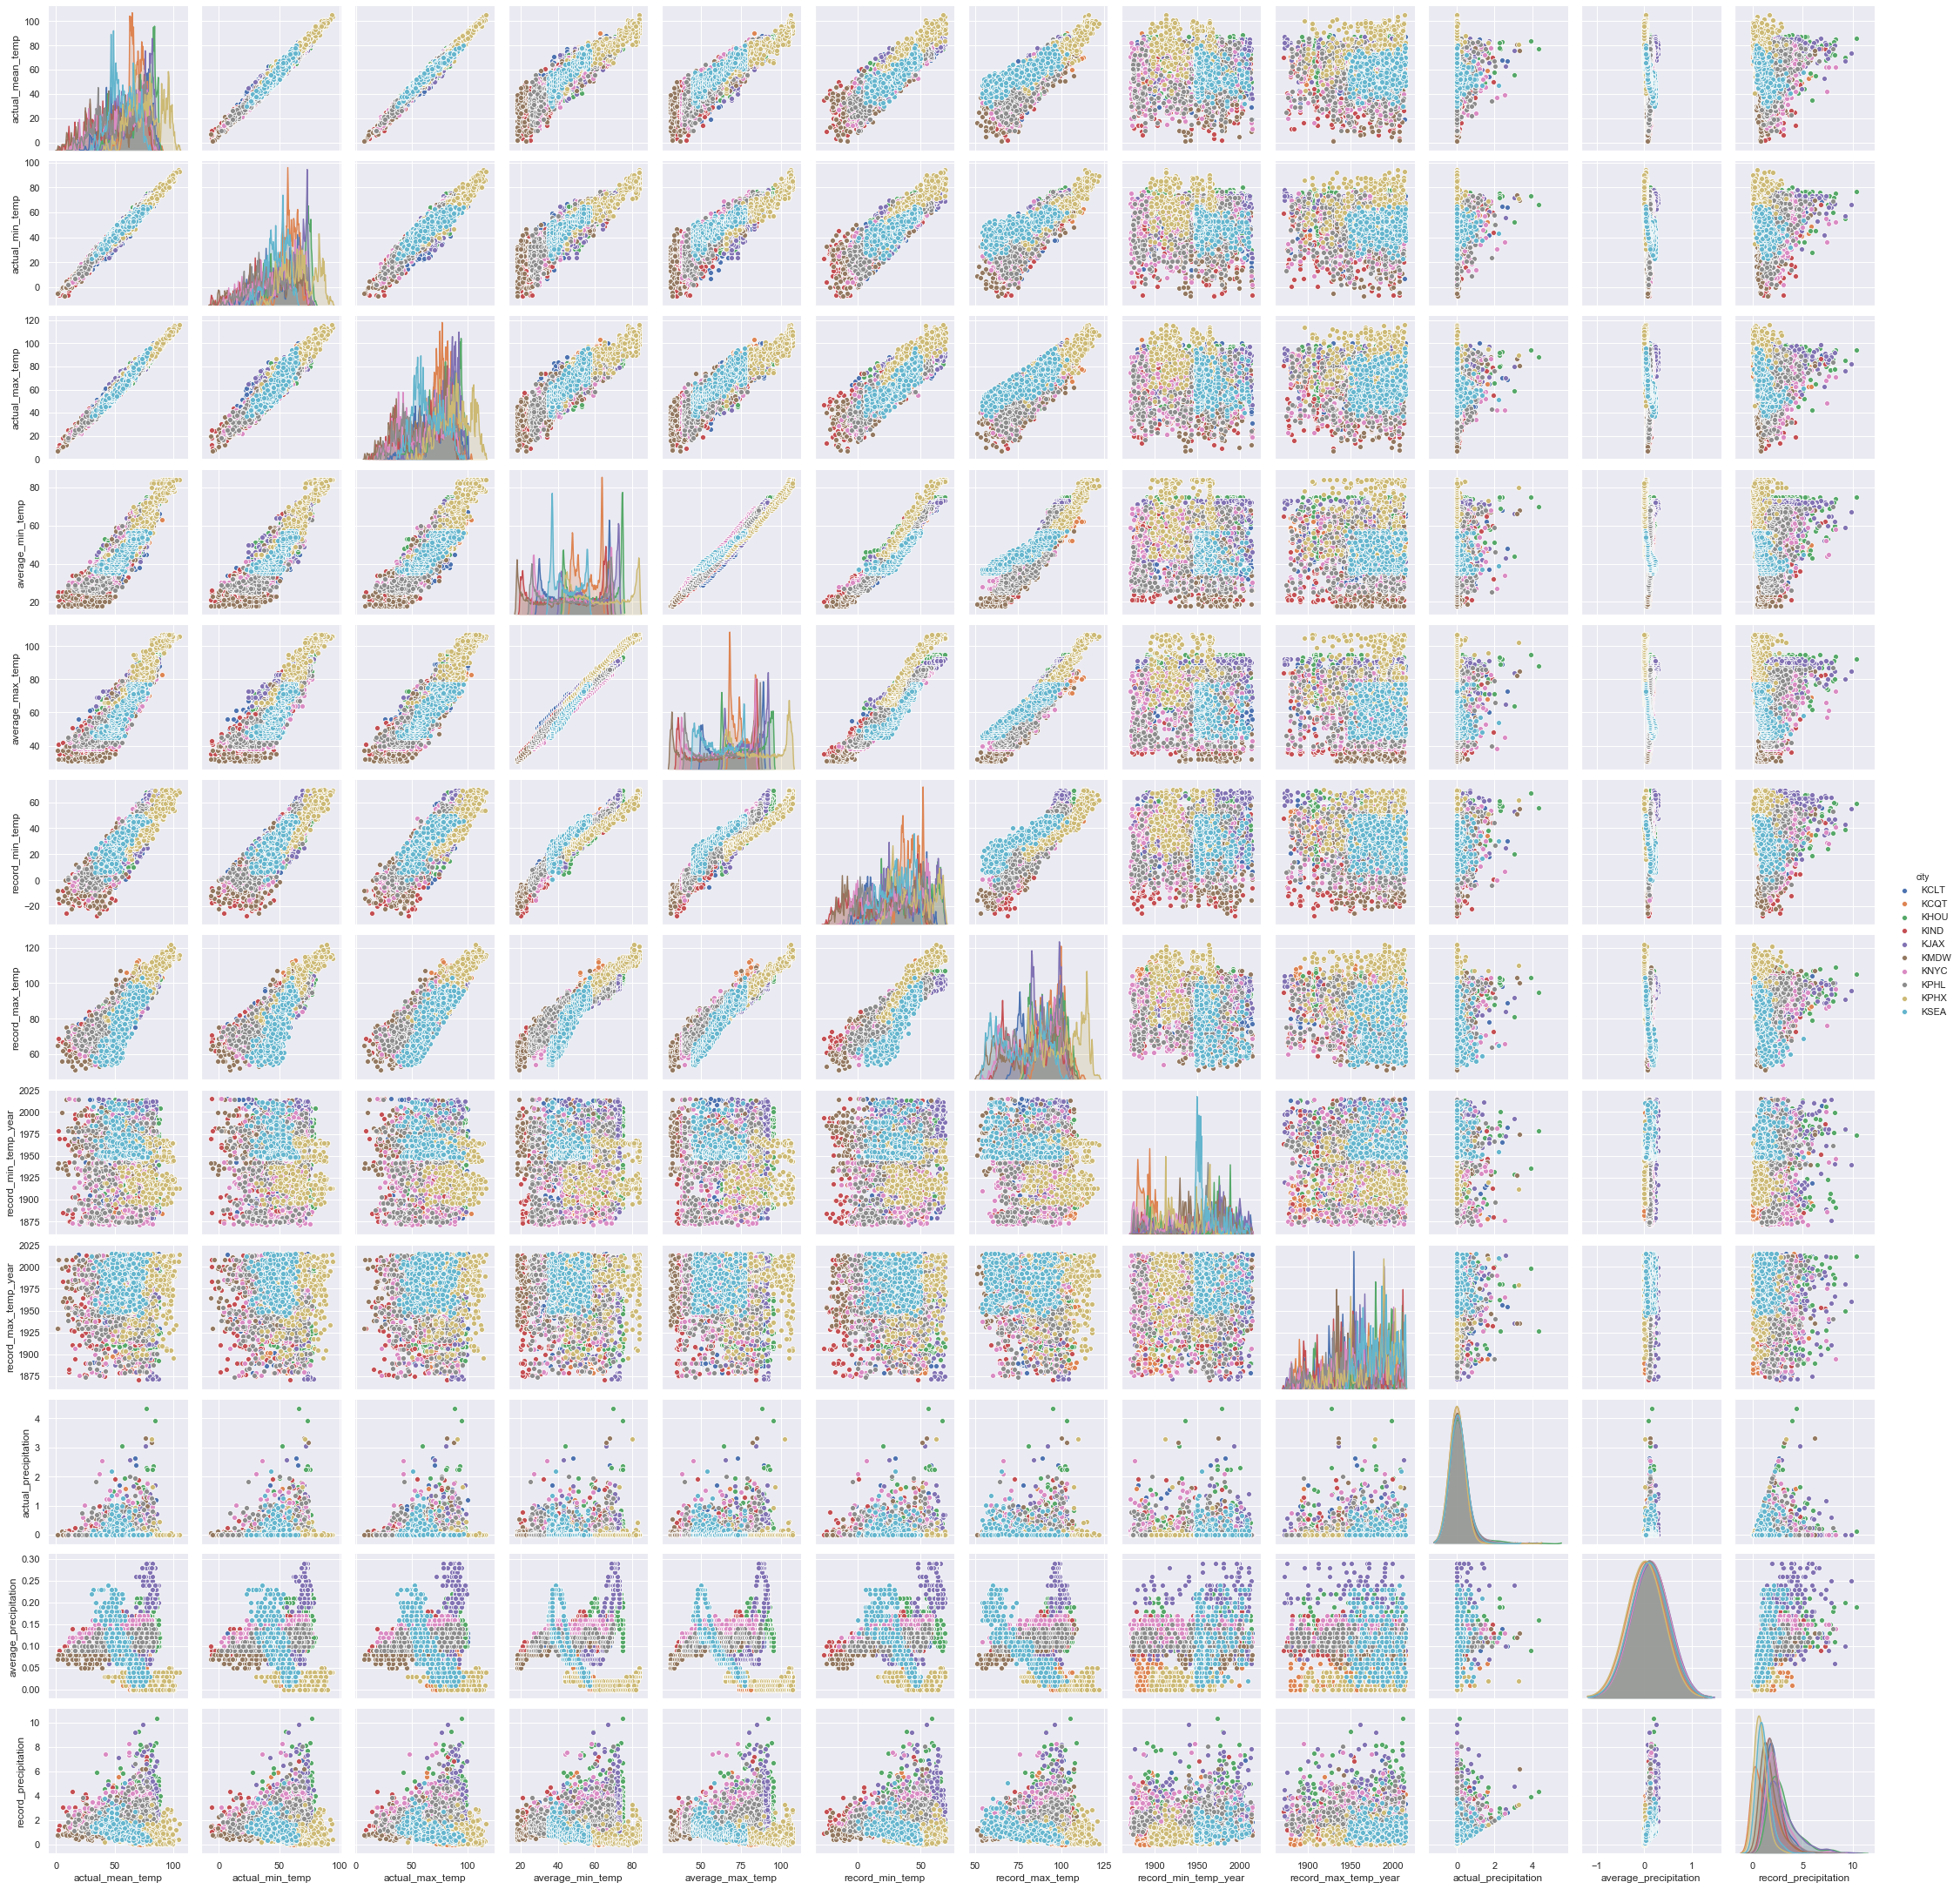

In [190]:
#to see the relation ship between vaiables 
matrix_plot = sns.pairplot(single_df, hue="city", diag_kws={'bw': 0.4})
matrix_plot.savefig('matrix.png')
matrix_plot.show()

In [169]:
#use plotly to generate histogram of Actual mean temp. examine normality and distribution. 

fig = px.histogram(single_df, x="actual_mean_temp",color="city",marginal="box", color_discrete_map= pal,)
fig.show()
py.plot(fig, filename = " Actual Mean temp Histogram " ,auto_open=True)

'https://plotly.com/~congruency/436/'

In [120]:
#compare mean temp distributions between cities, it looks like there is evidence that the mans are not equal.
fig = px.violin(single_df, y="actual_mean_temp", x="city",  box=True, color = "city", color_discrete_map= pal)
fig.show()
py.plot(fig, filename = "actual mean temp Violin plot " ,auto_open=True)

In [171]:
#use plotly to generate histogram of Actual precipitation. examine normality and distribution. 
fig = px.histogram(single_df, x="average_precipitation",color="city",marginal="box", nbins = 55, color_discrete_map= pal)
fig.show()
py.plot(fig, filename = "Average precipitation histogram" ,auto_open=True)

'https://plotly.com/~congruency/440/'

In [191]:
#generate violin plots to see distribution of precipitation accumulation
fig = px.violin(single_df, y="actual_precipitation", x="city",  box=True, color = "city", color_discrete_map= pal)
fig.show()
py.plot(fig, filename = " actual_precipitation Violin plot " ,auto_open=True)

PlotlyRequestError: Sorry, a file named 'actual_precipitation Violin plot _grid' already exists

In [172]:
#total rainfall as represented by individual sities. Each box is proportional to the city rainfal/ total rainfal.
fig = px.treemap(single_df,title = "Proportion of total Average Rainfall by City color coded by Average Rainfall Amount",
                 path=['city'], values='average_precipitation', color='average_precipitation',
                 color_continuous_scale='RdBu', 
color_continuous_midpoint=np.average(single_df['average_precipitation']))
fig.show()
py.plot(fig, filename = "Average Rainfall treemap" ,auto_open=True)

'https://plotly.com/~congruency/442/'

In [173]:
#similar to above. but for this year 
fig = px.treemap(single_df,title = "Proportion of total Actual Rainfall by City color coded by mean Actual Rainfall Amount",
                 path=['city'], values='actual_precipitation', color='actual_precipitation',
                 color_continuous_scale='RdBu', 
color_continuous_midpoint=np.average(single_df['actual_precipitation']))
fig.show()
py.plot(fig, filename = "Actual precipitation Tree map " ,auto_open=True)

'https://plotly.com/~congruency/444/'

To make analysis easier I will combine the fields of interest into  seperate data frames for actual rainfalf, actual mean temp and average rainfall.


In [128]:
actual_temp =pd.DataFrame({ws_list[0]:df_list[0]["actual_mean_temp"], 
                           ws_list[1]:df_list[1]["actual_mean_temp"],
                           ws_list[2]:df_list[2]["actual_mean_temp"], 
                           ws_list[3]:df_list[3]["actual_mean_temp"], 
                           ws_list[4]:df_list[4]["actual_mean_temp"],
                           ws_list[5]:df_list[5]["actual_mean_temp"], 
                           ws_list[6]:df_list[6]["actual_mean_temp"], 
                           ws_list[7]:df_list[7]["actual_mean_temp"],
                           ws_list[8]:df_list[8]["actual_mean_temp"], 
                           ws_list[9]:df_list[9]["actual_mean_temp"], 
    
    
    
    
    
})


actual_temp.describe()

KCLT    KCQT    KHOU    KIND    KJAX    KMDW    KNYC    KPHL    KPHX  \
count  365.00  365.00  365.00  365.00  365.00  365.00  365.00  365.00  365.00   
mean    61.05   68.56   69.72   51.39   68.98   51.05   54.74   55.88   77.32   
std     16.06    6.86   13.67   20.11   12.24   20.35   18.68   18.95   14.06   
min     18.00   48.00   35.00    2.00   34.00    1.00   11.00   10.00   41.00   
25%     47.00   64.00   60.00   35.00   59.00   35.00   39.00   39.00   66.00   
50%     63.00   68.00   72.00   54.00   71.00   53.00   58.00   59.00   77.00   
75%     75.00   74.00   82.00   70.00   80.00   70.00   72.00   73.00   90.00   
max     88.00   90.00   89.00   81.00   87.00   83.00   85.00   86.00  105.00   

         KSEA  
count  365.00  
mean    56.54  
std     10.44  
min     30.00  
25%     49.00  
50%     56.00  
75%     65.00  
max     80.00

In [134]:
#are all cities mean temp equal to each other? The null hypothesis is that they are.
F, p = stats.f_oneway(actual_temp["KCLT"],actual_temp["KCQT"],actual_temp["KHOU"],
                      actual_temp["KIND"],actual_temp["KJAX"],actual_temp["KMDW"],
                      actual_temp["KNYC"],actual_temp["KPHL"],actual_temp["KPHX"],actual_temp["KSEA"] )
F,p

(120.77961171485465, 3.724055073722315e-199)

In [174]:
print('F-Statistic=%.3f, p=%.3f, we have sufficient evidence to reject the null hypothesis that all cities mean temp is equal.' % (F, p))

F-Statistic=7.989, p=0.000, we fail to reject the null hypothesis that all cities mean temp is equal.


In [143]:
#Which cities are not equal? Use Tukeys HSD test to account for multiple testing.
#stats.models requires the data to be in a numpy.array()
temp = single_df["actual_mean_temp"].to_numpy()
city = single_df["city"].to_numpy()
mc = statsmodels.stats.multicomp.MultiComparison(temp,city)
mc_results = mc.tukeyhsd()

#if 0 is in the range lower to upper we lack evidence to reject the null that the cities actual mean temp is equal.
#
print(mc_results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
  KCLT   KCQT   7.5123  0.001    3.826  11.1987   True
  KCLT   KHOU   8.6658  0.001   4.9794  12.3521   True
  KCLT   KIND  -9.6575  0.001 -13.3439  -5.9712   True
  KCLT   KJAX   7.9288  0.001   4.2424  11.6151   True
  KCLT   KMDW    -10.0  0.001 -13.6864  -6.3136   True
  KCLT   KNYC  -6.3123  0.001  -9.9987   -2.626   True
  KCLT   KPHL  -5.1644  0.001  -8.8508   -1.478   True
  KCLT   KPHX  16.2712  0.001  12.5849  19.9576   True
  KCLT   KSEA  -4.5068 0.0044  -8.1932  -0.8205   True
  KCQT   KHOU   1.1534    0.9   -2.533   4.8398  False
  KCQT   KIND -17.1699  0.001 -20.8562 -13.4835   True
  KCQT   KJAX   0.4164    0.9  -3.2699   4.1028  False
  KCQT   KMDW -17.5123  0.001 -21.1987  -13.826   True
  KCQT   KNYC -13.8247  0.001  -17.511 -10.1383   True
  KCQT   KPHL -12.6767  0.001 -16.3631  -8.9903   True
  KCQT   K

In [144]:
#Test the null hypothesis that all states have equal actual preciptation
#new data frame of just actual preciptation values by city.
actual_precip =pd.DataFrame({ws_list[0]:df_list[0]["actual_precipitation"], 
                           ws_list[1]:df_list[1]["actual_precipitation"],
                           ws_list[2]:df_list[2]["actual_precipitation"], 
                           ws_list[3]:df_list[3]["actual_precipitation"], 
                           ws_list[4]:df_list[4]["actual_precipitation"],
                           ws_list[5]:df_list[5]["actual_precipitation"], 
                           ws_list[6]:df_list[6]["actual_precipitation"], 
                           ws_list[7]:df_list[7]["actual_precipitation"],
                           ws_list[8]:df_list[8]["actual_precipitation"], 
                           ws_list[9]:df_list[9]["actual_precipitation"], 
    
    
    
    
    
})
#what our data looks like, there may be issues with unequal variance.
actual_precip.describe()

KCLT    KCQT    KHOU    KIND    KJAX    KMDW    KNYC    KPHL    KPHX  \
count  365.00  365.00  365.00  365.00  365.00  365.00  365.00  365.00  365.00   
mean     0.10    0.02    0.18    0.11    0.12    0.10    0.13    0.12    0.03   
std      0.30    0.13    0.51    0.26    0.34    0.32    0.33    0.30    0.21   
min      0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
25%      0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
50%      0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
75%      0.03    0.00    0.08    0.07    0.01    0.04    0.05    0.05    0.00   
max      2.65    1.60    4.34    1.91    3.05    3.31    2.54    2.01    3.29   

         KSEA  
count  365.00  
mean     0.10  
std      0.24  
min      0.00  
25%      0.00  
50%      0.00  
75%      0.06  
max      2.20

In [145]:
F, p = stats.f_oneway(actual_precip["KCLT"],actual_precip["KCQT"],actual_precip["KHOU"],
                      actual_precip["KIND"],actual_precip["KJAX"],actual_precip["KMDW"],
                      actual_precip["KNYC"],actual_precip["KPHL"],actual_precip["KPHX"],actual_precip["KSEA"] )
F,p

(7.989189371027172, 8.5771581994084e-12)

In [175]:
print('F-Statistic=%.3f, p=%.3f, we have sufficient evidence to  reject the null hypothesis that all cities actual precipitation is equal is equal.' % (F, p))

F-Statistic=7.989, p=0.000, we fail to reject the null hypothesis that all cities mean temp is equal.


In [147]:
#Which cities are not equal? Use Tukeys HSD test to account for multiple testing.
#stats.models requires the data to be in a numpy.array()
precip = single_df["actual_precipitation"].to_numpy()
city = single_df["city"].to_numpy()
mc = statsmodels.stats.multicomp.MultiComparison(precip,city)
mc_results = mc.tukeyhsd()

print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  KCLT   KCQT  -0.0791 0.0194 -0.1514 -0.0067   True
  KCLT   KHOU   0.0746  0.037  0.0022  0.1469   True
  KCLT   KIND   0.0033    0.9  -0.069  0.0756  False
  KCLT   KJAX   0.0179    0.9 -0.0544  0.0902  False
  KCLT   KMDW  -0.0037    0.9  -0.076  0.0687  False
  KCLT   KNYC   0.0238    0.9 -0.0486  0.0961  False
  KCLT   KPHL   0.0221    0.9 -0.0502  0.0945  False
  KCLT   KPHX  -0.0747 0.0364  -0.147 -0.0024   True
  KCLT   KSEA   0.0001    0.9 -0.0722  0.0725  False
  KCQT   KHOU   0.1536  0.001  0.0813   0.226   True
  KCQT   KIND   0.0824 0.0117  0.0101  0.1547   True
  KCQT   KJAX    0.097  0.001  0.0246  0.1693   True
  KCQT   KMDW   0.0754  0.033  0.0031  0.1477   True
  KCQT   KNYC   0.1028  0.001  0.0305  0.1751   True
  KCQT   KPHL   0.1012  0.001  0.0289  0.1735   True
  KCQT   KPHX   0.0044    0.9 -0.0679  0.0767 

In [163]:
# using a  T-test, we want to examine if all rainfall3 cities that had values greater or smaller than their average years precipitation.
# We are using a t20 sided T test to see if the means are equal, rejection of alpha = 0.05

average_precip = single_df["average_precipitation"].to_numpy()
precip = single_df["actual_precipitation"].to_numpy()
twosample_results = scipy.stats.ttest_ind(average_precip, precip)
matrix_twosample = [
    ['All Cities', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_results[0], twosample_results[1]]
]

matrix_twosample

[['All Cities', 'Test Statistic', 'p-value'],
 ['Sample Data', 0.4801150403636724, 0.6311599835212919]]

In [ ]:
# with a pval >.05 we have insufficient evidence to reject the null

In [161]:
# using a  T-test, we want to examine if 3 cities (KJAX, KHOU, KCQT)that had values 
#greater or smaller than their average years precipitation.
# We are using a 2 sided T test to see if the means are equal, rejection of alpha = 0.05
jax_average_precip = jax_df["average_precipitation"].to_numpy()
jax_actual_precip = jax_df["actual_precipitation"].to_numpy()
twosample_results = scipy.stats.ttest_ind(jax_average_precip, jax_actual_precip)
matrix_twosample = [
    ['KJAX', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_results[0], twosample_results[1]]
]

matrix_twosample

[['KJAX', 'Test Statistic', 'p-value'],
 ['Sample Data', 1.2796855092197574, 0.20106342716215503]]

In [160]:
hou_average_precip = hou_df["average_precipitation"].to_numpy()
hou_actual_precip = hou_df["actual_precipitation"].to_numpy()
twosample_results = scipy.stats.ttest_ind(hou_average_precip, hou_actual_precip)
matrix_twosample = [
    ['KHOU', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_results[0], twosample_results[1]]
]

matrix_twosample

[['KHOU', 'Test Statistic', 'p-value'],
 ['Sample Data', -1.532431074762674, 0.12585051967612765]]

In [159]:
cqt_average_precip = cqt_df["average_precipitation"].to_numpy()
cqt_actual_precip = cqt_df["actual_precipitation"].to_numpy()
twosample_results = scipy.stats.ttest_ind(cqt_average_precip, cqt_actual_precip)
matrix_twosample = [
    ['KCQT', 'Test Statistic', 'p-value'],
    ['Sample Data', twosample_results[0], twosample_results[1]]
]

matrix_twosample

[['KCQT', 'Test Statistic', 'p-value'],
 ['Sample Data', 2.4134868470220354, 0.016046620590164498]]

In [ ]:
#with a pval <0.05 we have sufficient evidence to reject the null that the mean rainfall for this year was different than the average year